In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
df = pd.read_csv("aug_train.csv")

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [3]:
#Check for missing obs
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [4]:
#coorelation matrix
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [5]:
#encode and clean experience
def clean_experience(df):
    for i in df["experience"]:
        if(i==">20"):
            df["experience"][df["experience"]==i]=27
        if(i == "<1"):
            df["experience"][df["experience"]==i]=0
clean_experience(df)

df["experience"] = df["experience"].fillna(0)
df["experience"] = df['experience'].astype('int')


In [6]:
#clean missing variables
def clean_NAN(df):
    df["gender"] = df["gender"].fillna("Unknown")
    df["education_level"]=df["education_level"].fillna("Unknown")
    df["major_discipline"].fillna(value="Unknown", inplace=True)
    df["experience"] = df["experience"].fillna(df["experience"].mean())
    df["company_type"] = df["company_type"].fillna("Unknown")

clean_NAN(df)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,27,NaN,Unknown,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Unknown,No relevent experience,Full time course,Graduate,STEM,5,NaN,Unknown,never,83,0
3,33241,city_115,0.789,Unknown,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,27,50-99,Funded Startup,4,8,0


In [7]:
#encode relevent_experience, relevant experience : 1 and non relevant : 0
df.relevent_experience = df.relevent_experience.map({'No relevent experience': 0,'Has relevent experience': 1})

#encode education_level
df.education_level = df.education_level.map({'Unknown': 0,'Primary School': 1,'High School': 2,'Graduate': 3,'Masters': 4,'Phd': 5})

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,1,no_enrollment,3,STEM,27,NaN,Unknown,1,36,1
1,29725,city_40,0.776,Male,0,no_enrollment,3,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Unknown,0,Full time course,3,STEM,5,NaN,Unknown,never,83,0
3,33241,city_115,0.789,Unknown,0,NaN,3,Business Degree,0,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,1,no_enrollment,4,STEM,27,50-99,Funded Startup,4,8,0


In [8]:
df.corr()

,enrollee_id,city_development_index,relevent_experience,education_level,experience,training_hours,target
enrollee_id,1.000000,-0.040455,-0.043359,-0.017848,-0.031217,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.059808,0.043123,0.325927,0.001920,-0.341665
relevent_experience,-0.043359,0.059808,1.000000,0.237202,0.309926,0.011566,-0.128430
education_level,-0.017848,0.043123,0.237202,1.000000,0.243861,-0.013742,-0.004372
experience,-0.031217,0.325927,0.309926,0.243861,1.000000,-0.001101,-0.166565
training_hours,0.000998,0.001920,0.011566,-0.013742,-0.001101,1.000000,-0.021577
target,0.049475,-0.341665,-0.128430,-0.004372,-0.166565,-0.021577,1.000000


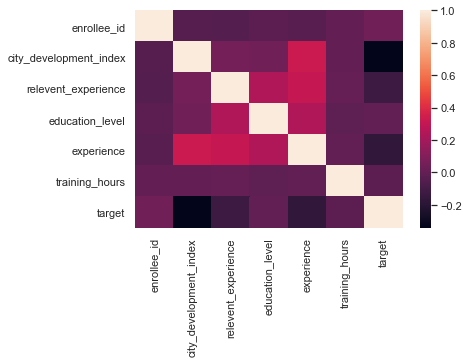

In [9]:
sns.heatmap(df.corr())

In [10]:
#select various x variables
X = pd.DataFrame(df, columns = ['city_development_index','relevent_experience','education_level','experience','training_hours'])
X.head()

,city_development_index,relevent_experience,education_level,experience,training_hours
0,0.920,1,3,27,36
1,0.776,0,3,15,47
2,0.624,0,3,5,83
3,0.789,0,3,0,52
4,0.767,1,4,27,8


In [11]:
Y = pd.Series(df.target, name = 'Target')
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: Target, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=19,test_size=0.25)
X_test.head()

,city_development_index,relevent_experience,education_level,experience,training_hours
3178,0.624,1,3,2,14
11882,0.893,0,2,5,43
94,0.920,1,3,10,48
8242,0.920,1,3,27,72
17692,0.802,1,4,27,30


In [13]:
y_test.head()

3178     1
11882    0
94       0
8242     1
17692    0
Name: Target, dtype: int64

In [13]:
######################################### Logistic Regression ###################################
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
# Scale for the classification dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [17]:
grid_parameters = {
    'tol':[0.01,0.1,1],
    'random_state':[0,1],
    'solver':['lbfgs','sag'],
    'max_iter':[100,1000]
    }
grid = GridSearchCV(LogisticRegression(),grid_parameters,cv=4)

In [18]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000], 'random_state': [0, 1],
                         'solver': ['lbfgs', 'sag'], 'tol': [0.01, 0.1, 1]})

In [19]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_iter': 100, 'random_state': 0, 'solver': 'sag', 'tol': 1}
LogisticRegression(random_state=0, solver='sag', tol=1)
0.7623190423162584


In [21]:
# Find testing score - accuracy
grid.score(X_test_scaled, y_test)

0.7459290187891441

In [27]:
from sklearn.metrics import accuracy_score
y_pred = grid.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7459290187891441

In [25]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[3277  313]
 [ 904  296]]

Classification report :
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      3590
           1       0.49      0.25      0.33      1200

    accuracy                           0.75      4790
   macro avg       0.63      0.58      0.59      4790
weighted avg       0.71      0.75      0.71      4790



Text(0.5, 12.5, 'Predicted label')

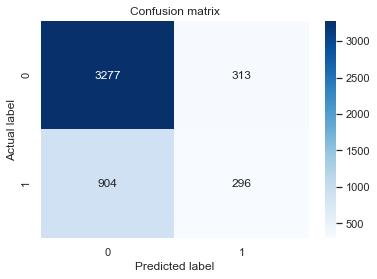

In [28]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
############################################# KNN ################################################
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [15]:
#score that comes from testing, used on training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score is {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score is 95.84493318485524 % and k = [1]


In [16]:
#scores that were set aside for testing
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score is {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max test score is 74.8643006263048 % and k = [10]


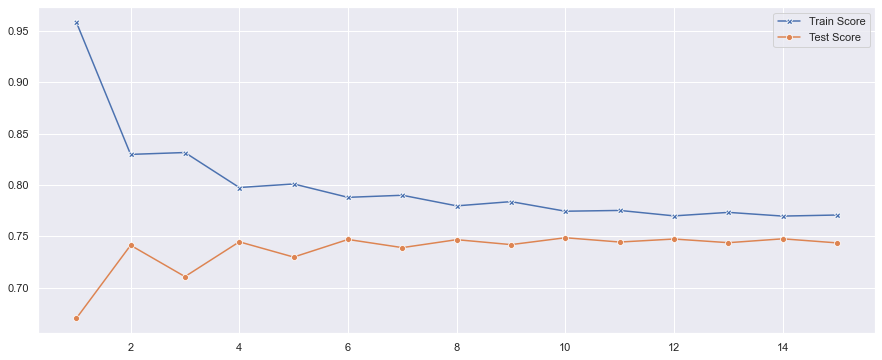

In [17]:
plt.figure(figsize=(15,6))
p = sns.lineplot(range(1,16),train_scores,marker='X',label='Train Score')
p = sns.lineplot(range(1,16),test_scores,marker='o',label='Test Score')


In [18]:
#Best result is at k = 10 so we use 10 is used for the final model
#Setup knn classifier with k neighbors
knn = KNeighborsClassifier(10)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.748643006263048

In [19]:
from sklearn.model_selection import cross_val_score

# for neighbours from 1 -10, graph the k_fold scores
nb = []
max = 0
k = 0

for i in range(1,10,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    score = cross_val_score(knn, X, Y, cv=4).mean()
    if max < score:
        max = score 
        k = i
    nb.append(score)

print('The Optimal K :', k)    
nb



The Optimal K : 9


[0.6716771777355116,
 0.6889025432761491,
 0.6960536084128075,
 0.7000728552864057,
 0.7060755750717872,
 0.7090509043210105,
 0.7119738780285894,
 0.7138529341117933,
 0.7161497337975727]

In [21]:
cross_val_score(9, X, Y, cv=4).mean()

TypeError: estimator should be an estimator implementing 'fit' method, 9 was passed

Text(0, 0.5, 'K-fold Scores')

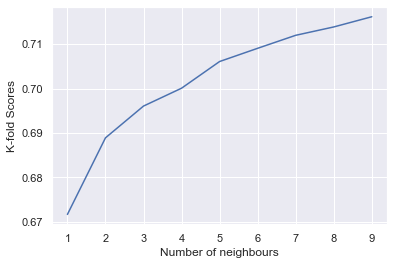

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,10,1), nb)
plt.xlabel('Number of neighbours')
plt.ylabel('K-fold Scores')

In [39]:
# Find confusion matrix, classification report
#y_pred = knn.fit(X_test,y_test)
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[3586    4]
 [  87 1113]]

Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3590
           1       1.00      0.93      0.96      1200

    accuracy                           0.98      4790
   macro avg       0.99      0.96      0.97      4790
weighted avg       0.98      0.98      0.98      4790



Text(0.5, 12.5, 'Predicted label')

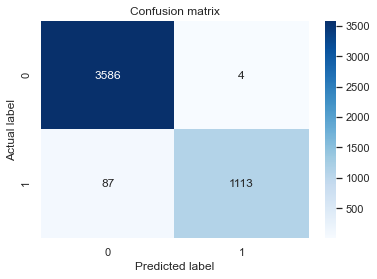

In [40]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
####################################### SVM ###########################################

#import packages
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [71]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3],
                    }
grid = GridSearchCV(SVC(),param_grid=params_dictionary,cv=4)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

In [16]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(C=1, degree=2, kernel='linear'),X_train,y_train,cv=4,scoring='accuracy').mean()

In [17]:
grid.score(X_test,y_test)

In [37]:
y_pred = grid.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=19, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy')

In [38]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

0.764509394572025

Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      3590
         1.0       0.58      0.21      0.31      1200

    accuracy                           0.76      4790
   macro avg       0.68      0.58      0.58      4790
weighted avg       0.73      0.76      0.72      4790



Text(0.5, 12.5, 'Predicted label')

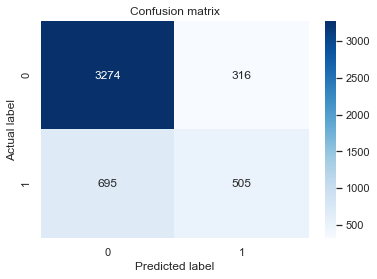

In [58]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
################################### Random Forest #############################
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [48]:
#Find out the best parameters using GridSearchCV
params = {
    'random_state':[0,1],
    'max_depth':[1,5,10],
    'n_estimators':[20,40,60,80,100]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=4)

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [0, 1]})

In [50]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_depth': 5, 'n_estimators': 60, 'random_state': 1}
RandomForestClassifier(max_depth=5, n_estimators=60, random_state=1)
0.7795796213808462


In [51]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(max_depth=10, n_estimators=60, random_state=1),X_train,y_train,cv=4,scoring='accuracy').mean()

0.7746380846325167

In [52]:
grid.score(X_test,y_test)

0.7889352818371608

In [53]:
y_pred = grid.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7889352818371608

In [56]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[3274  316]
 [ 695  505]]

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      3590
           1       0.62      0.42      0.50      1200

    accuracy                           0.79      4790
   macro avg       0.72      0.67      0.68      4790
weighted avg       0.77      0.79      0.77      4790



Text(0.5, 12.5, 'Predicted label')

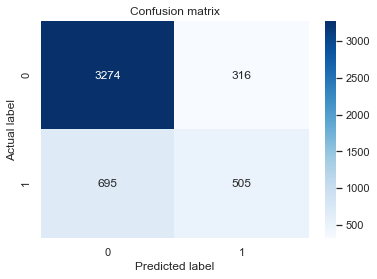

In [59]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
###################################### ADABOOST ########################################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [61]:
params = {
    'random_state':[0,1],
    'base_estimator':[
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=5),
        DecisionTreeClassifier(max_depth=10)
    ],
    'n_estimators':[20,40,60,80,100]}
grid = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=4)

In [62]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=10)],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [0, 1]})

In [64]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'base_estimator': DecisionTreeClassifier(max_depth=1), 'n_estimators': 80, 'random_state': 0}
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=80, random_state=0)
0.7759604677060133


In [65]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=80, random_state=0),X_train,y_train,cv=4,scoring='accuracy').mean()

0.7232739420935412

In [66]:
grid.score(X_test,y_test)

0.7864300626304802

In [67]:
y_pred = grid.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7864300626304802

In [68]:
# Find classification report - accuracy, precision, recall, f1-score,
#                               macro avg, weighted avg
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[3312  278]
 [ 745  455]]

Classification report :
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      3590
           1       0.62      0.38      0.47      1200

    accuracy                           0.79      4790
   macro avg       0.72      0.65      0.67      4790
weighted avg       0.77      0.79      0.77      4790



Text(0.5, 12.5, 'Predicted label')

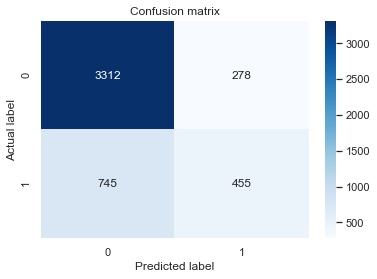

In [69]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')